# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import itertools 
import string
pd.set_option('display.max_rows', None) # This Command shows the maximum rows
pd.set_option('max_colwidth', None) # This command sets the width to the maximum lavel 

# Loading Dataset

In [2]:
df = pd.read_csv('drug/edited_data.tsv', sep='\t')

In [3]:
df.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"   
1                "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."   
2  "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."   
3                                                                                                                                                                                                                                                                                                                       "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is

In [4]:
df.condition.value_counts()

Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                                     2321

## Here selecting few most prominent and higly frequent medical condition to perform my analysis.

In [5]:
df_train = df[(df['condition']=='Birth Control') |
              (df['condition']=='Depression') |
              (df['condition']=='High Blood Pressure') |
              (df['condition']=='Diabetes, Type 2')]

In [6]:
df.shape

(161297, 6)

In [7]:
df_train.shape

(42732, 6)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42732 entries, 2 to 161291
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   42732 non-null  int64  
 1   drugName     42732 non-null  object 
 2   condition    42732 non-null  object 
 3   review       42732 non-null  object 
 4   rating       42732 non-null  float64
 5   usefulCount  42732 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 2.3+ MB


##  Out of 6 attributes,i am focusing on only two attributes namely ['condition' & 'review'] and dropping rest of all.

In [9]:
X = df_train.drop(['Unnamed: 0','drugName','rating','usefulCount'],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42732 entries, 2 to 161291
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   condition  42732 non-null  object
 1   review     42732 non-null  object
dtypes: object(2)
memory usage: 1001.5+ KB


In [10]:
X.condition.value_counts()

Birth Control          28788
Depression              9069
Diabetes, Type 2        2554
High Blood Pressure     2321
Name: condition, dtype: int64

## Creating sub-sets of data related to conditions seperately

In [11]:
X_birth=X[(X['condition']=='Birth Control')]
X_Dep = X[(X['condition']=='Depression')]
X_BP =  X[(X['condition']=='High Blood Pressure')]
X_Diab =X[(X['condition']=='Diabetes, Type 2')]

## Plotting word cloud to analyse which all words are having more frequency

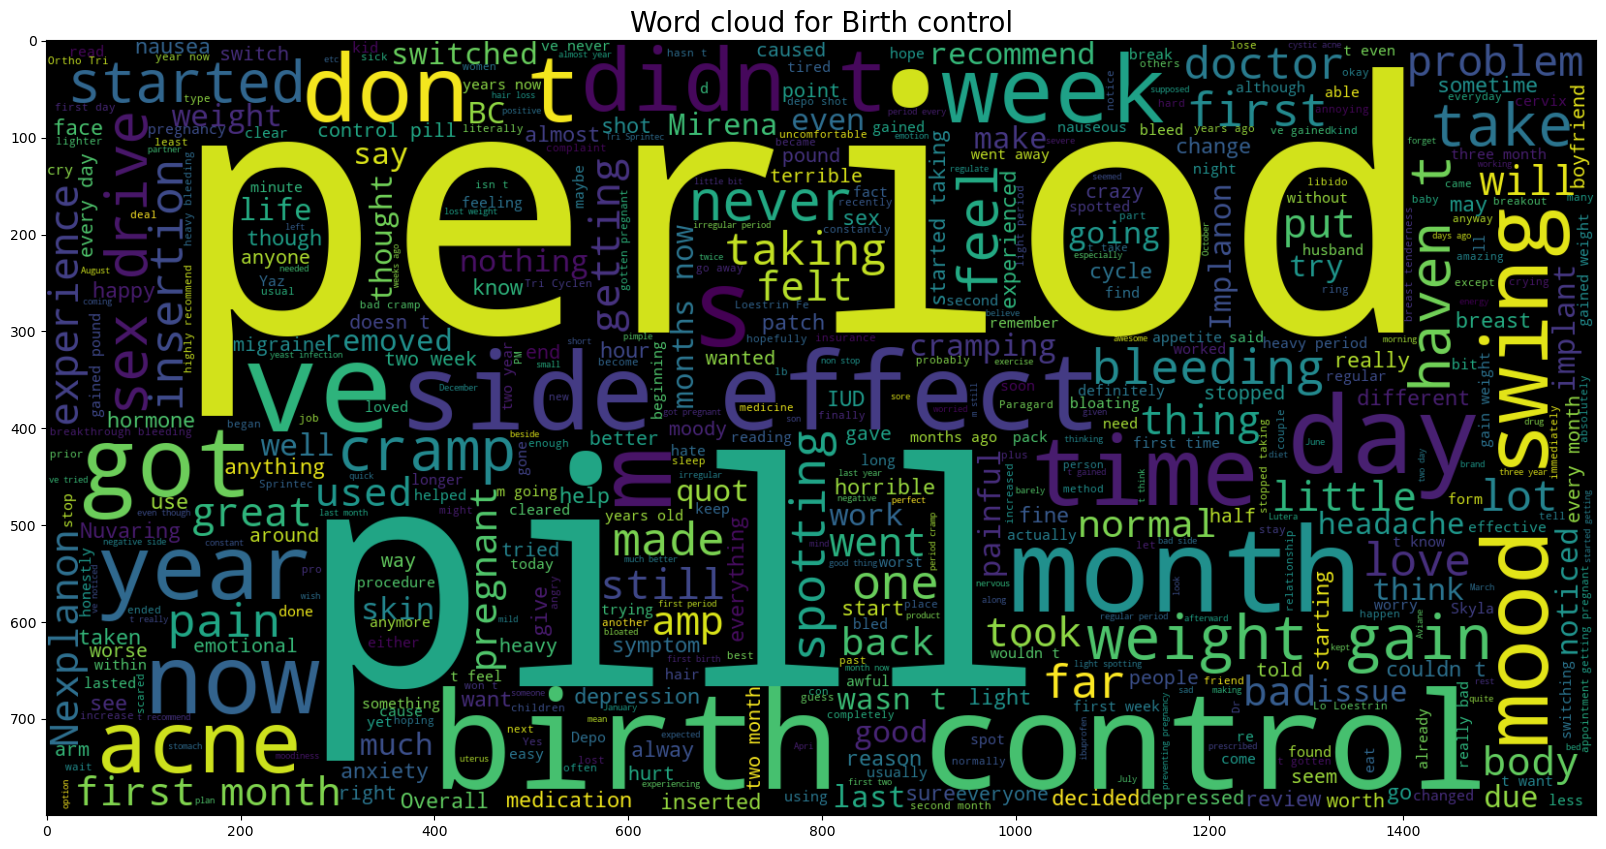

In [12]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_birth.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Birth control',fontsize=20)
plt.show()

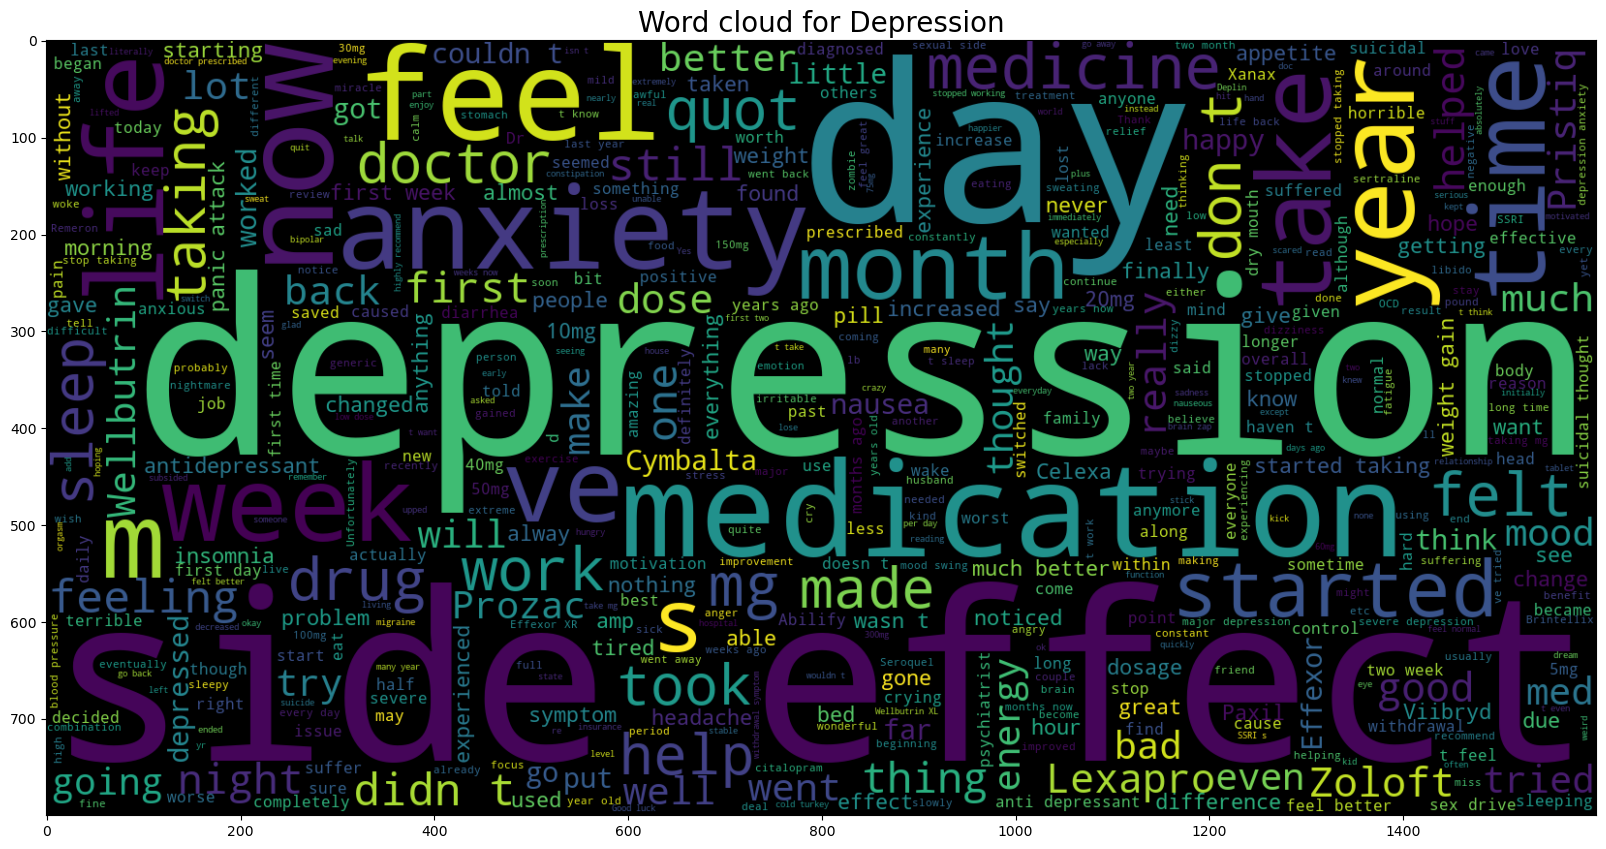

In [13]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_Dep.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Depression',fontsize=20)
plt.show()

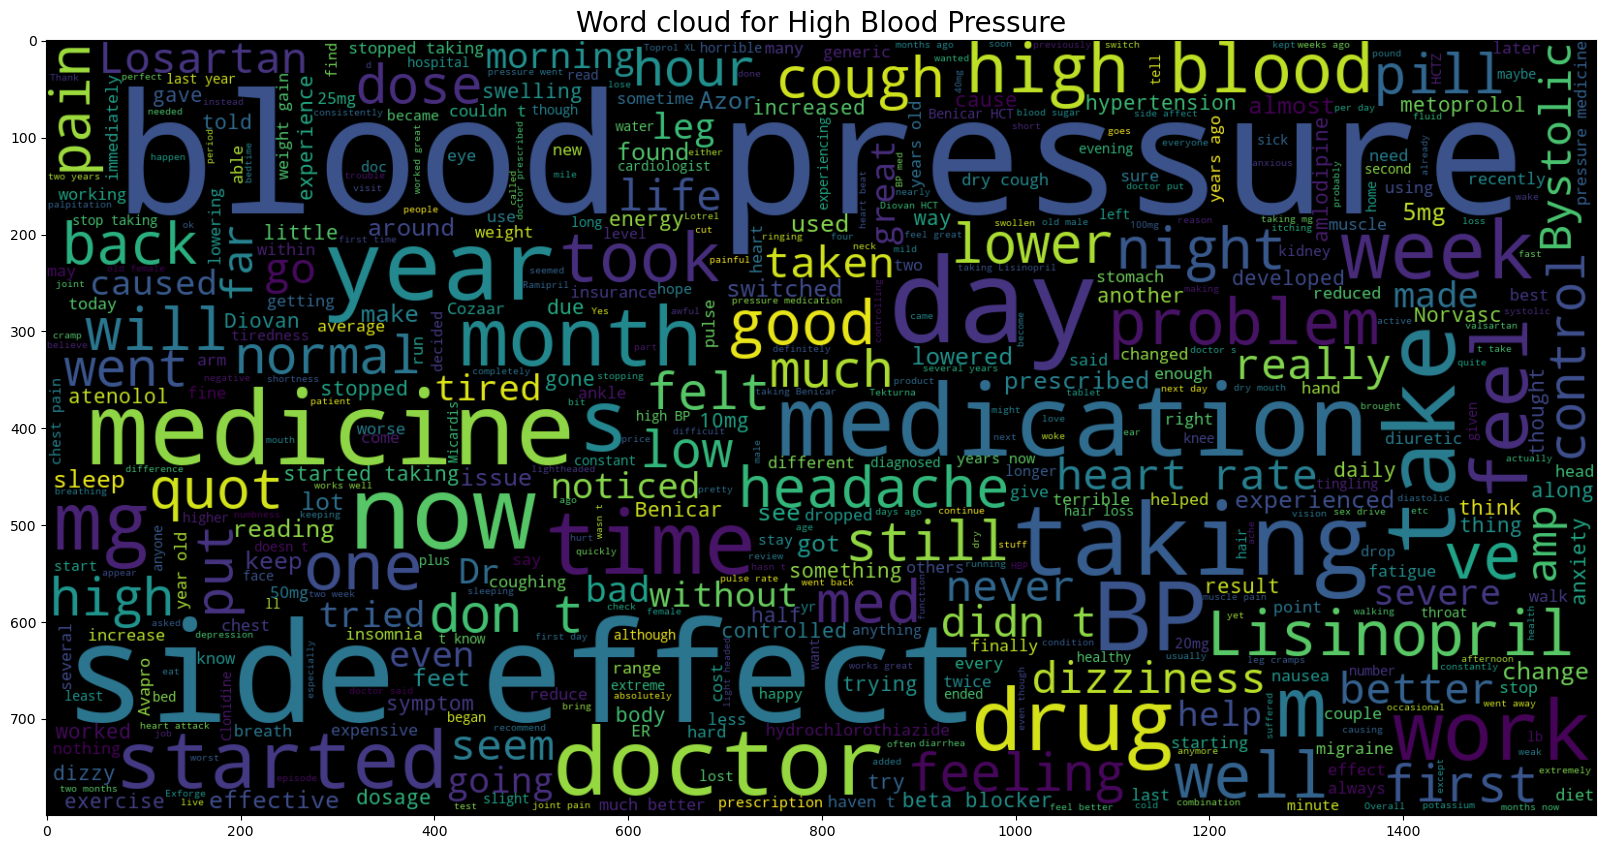

In [14]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_BP.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for High Blood Pressure',fontsize=20)
plt.show()

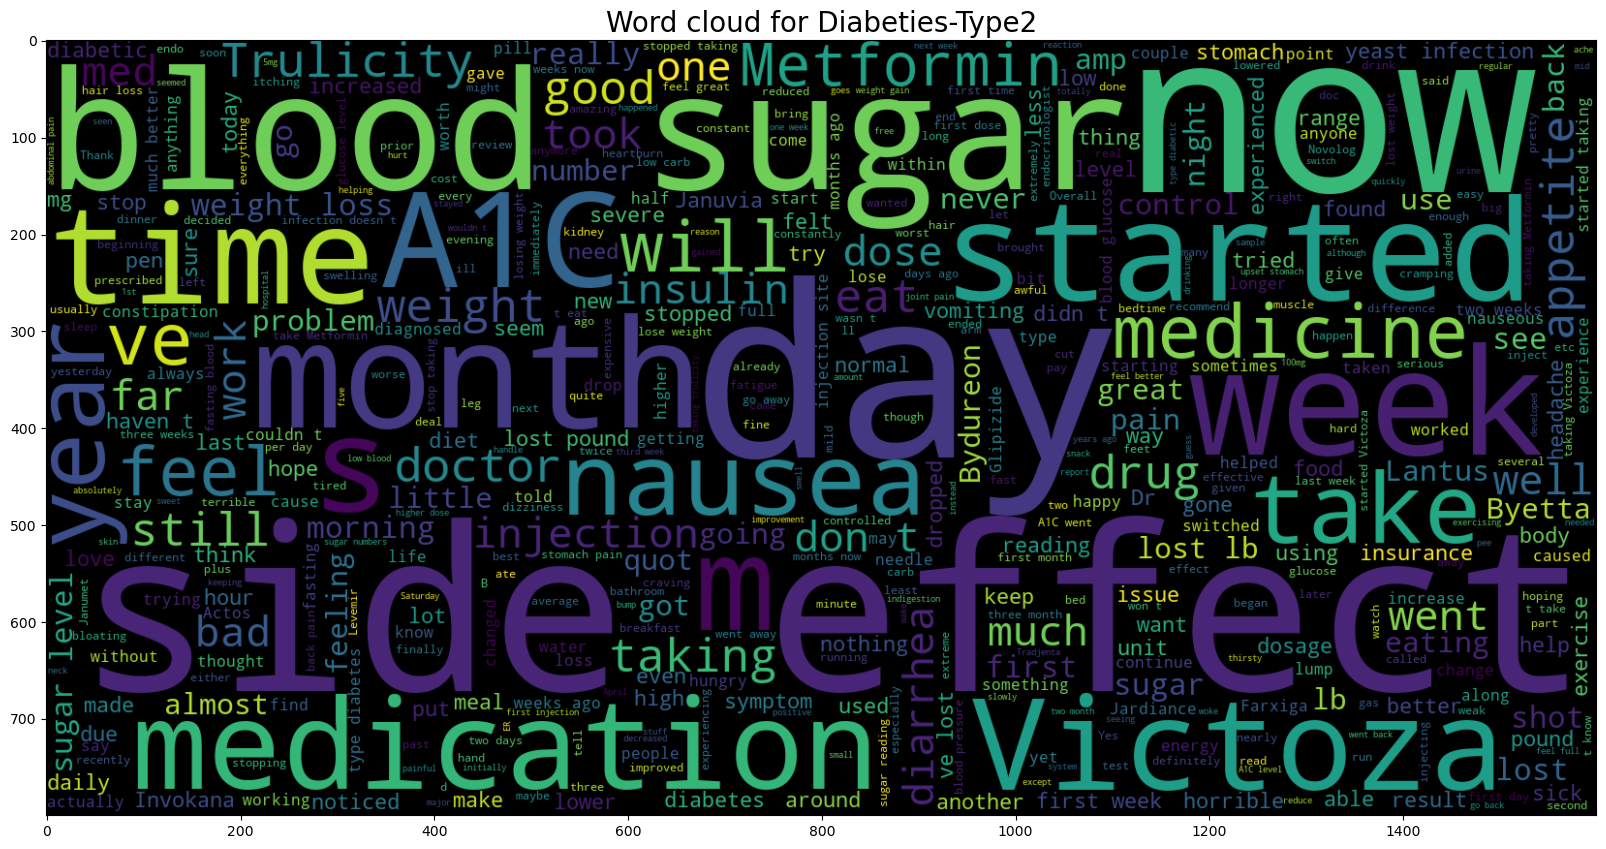

In [15]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_Diab.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Diabeties-Type2',fontsize=20)
plt.show()

# Data Preprocessing

In [16]:
X['review'].head(3)

2    "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."
3                                                                                                                                                                                                                                            

In [17]:
X['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

## Removing double quote (" ")

In [18]:
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')

In [19]:
X['review'][2]

'I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.'

In [20]:
X.head(2)

condition  \
2  Birth Control   
3  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  
2  I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.  
3                                                                                                                                                                                                                                                                                                                       This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch

## Removing stopwords

In [21]:
from nltk.corpus import stopwords

stop = stopwords.words('english')


In [22]:
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import re
lemmatizer = WordNetLemmatizer()

In [23]:
def Clean_Review(raw_review):
    # 1. This will  Delete HTML text and other special charecter from the review
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. This will Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3.  This will bring all letters in the review in lower letters
    words = letters_only.lower().split()
    # 5. Stopwords This will remove all the stopwords fro the review
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization  
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

## Appending new column containg cleaned reviews to corpous

In [24]:
X['Updated_Review'] = X['review'].apply(Clean_Review)
X.head(2)

C:\Users\Hp\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


condition  \
2  Birth Control   
3  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
2  I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.   
3                                                                                                                                                                                                                                                                                                                       This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch   

                                                                                                                                                                                                                                                                                                                                                                                                                                                 Updated_Review  
2  used take another oral contraceptive pill cycle happy light period max day side effect contained hormone gestodene available u switched lybrel ingredient similar pill ended started lybrel immediately first day period instruction said period lasted two week taking second pack two week third pack thing got even worse third period lasted two week end third week still daily brown discharge positive side side effect idea period free tempting ala  
3                                                                                                                                                                                                                  first time using form birth control glad went patch month first decreased libido subsided downside made period longer day exact used period day max also made cramp intense first two day period never cramp using birth control happy patch

# Machine Learning Model Building

In [25]:
# Seperating Predictor and Response Variable

X_feat=X['Updated_Review']
y=X['condition']

In [26]:
# Splitting dataset into train and test dataset,using "stratify" so that classes get distributed evenly.

X_train, X_test, y_train, y_test = train_test_split(X_feat, y,stratify=y,test_size=0.2, random_state=0)

In [27]:
# creating function to plot Confusion Matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Bag of Words

In [28]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

##  ML Model - Naive Bayes

accuracy:   0.970
Confusion matrix, without normalization


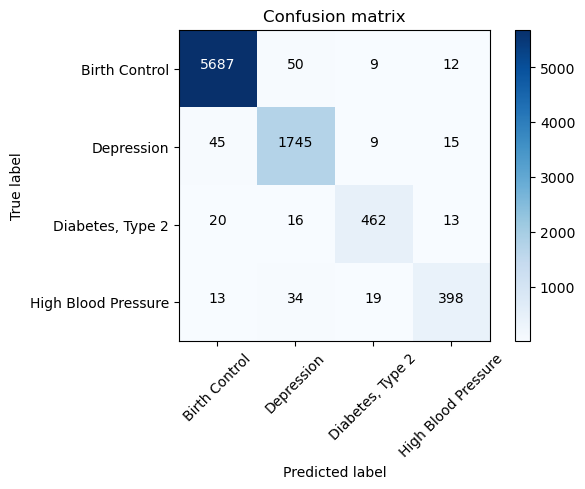

In [29]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plt.show()

## ML Model - Passive Aggressive Classifier

accuracy:   0.979
Confusion matrix, without normalization


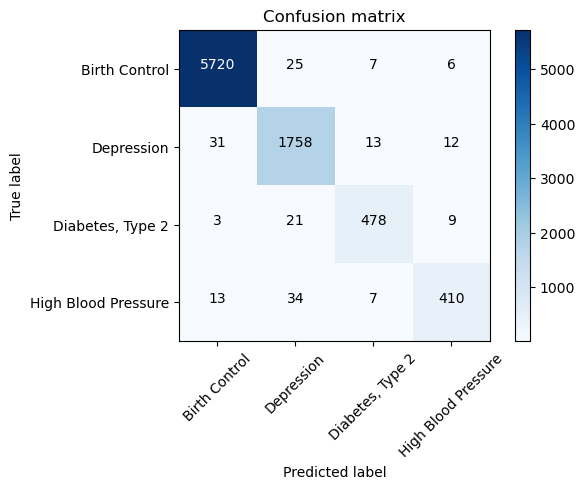

In [30]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

# Term Frequency Inverse Document Frequency (TF - IDF)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

##  ML Model - TFIDF

accuracy:   0.982
Confusion matrix, without normalization


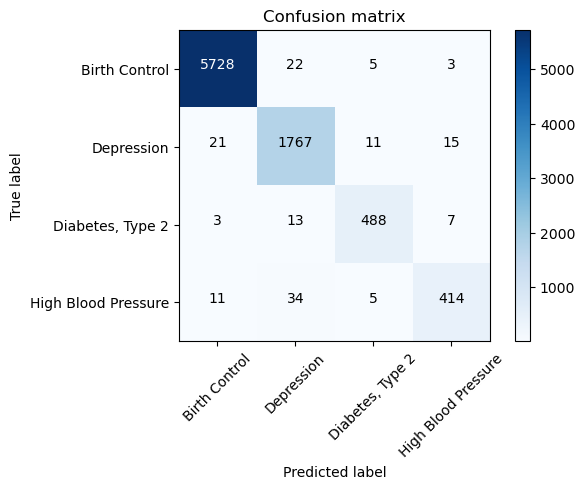

In [32]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

# Building ML Model using TFIDF Bigrams / Trigrams and evaluating the performance of the model

### (a) TFIDF - Bigram

accuracy:   0.985
Confusion matrix, without normalization


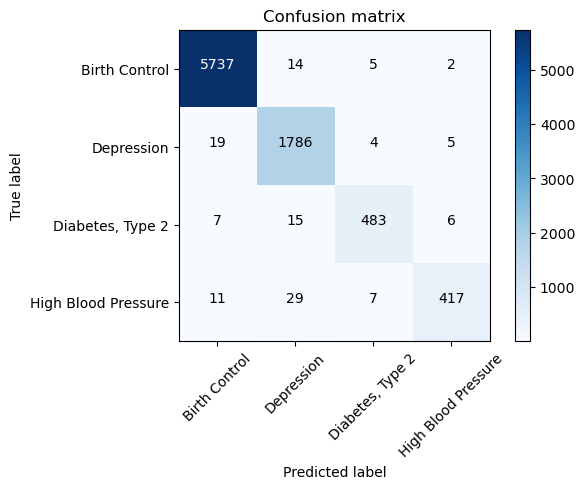

In [33]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

### (b) TFIDF - Trigram

accuracy:   0.985
Confusion matrix, without normalization


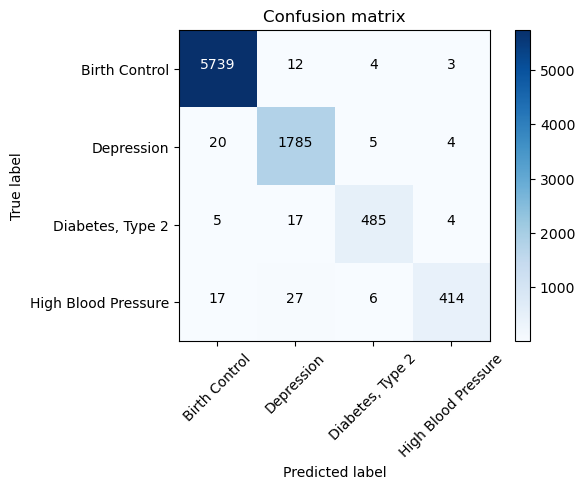

In [34]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

# Extracting the list of most prominent features of each classes

In [35]:
def prominent_features(vectorizer, classifier, classlabel, n=5):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names_out()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print (classlabel, feat, coef)

## prominent features of the attribute Birth Control

In [36]:
prominent_features(tfidf_vectorizer, pass_tf, 'Birth Control')

Birth Control packaged 0.6374369401444595
Birth Control tiny 0.6735731707516553
Birth Control addon 0.7098390962888347
Birth Control commit 1.2923924591270977
Birth Control freeway 7.064151277453542


## Prominent features of the attribute Depression

In [37]:
prominent_features(tfidf_vectorizer, pass_tf, 'Depression')

Depression assaulted 0.8989830877012641
Depression significantly 1.0914264237837303
Depression apnea 1.102470220049534
Depression subjective 1.128564782264016
Depression aliveness 3.5909104032294876


## Prominent features of the attribute Diabetes

In [38]:
prominent_features(tfidf_vectorizer, pass_tf, 'Diabetes, Type 2')

Diabetes, Type 2 prom 0.45045302953796257
Diabetes, Type 2 orthotricyclenlo 0.6006981405450227
Diabetes, Type 2 fot 0.7290012093543057
Diabetes, Type 2 proliferating 0.7712901089260988
Diabetes, Type 2 problem 2.9795758340368965


## Prominent features of the attribute Blood-Pressure

In [39]:
prominent_features(tfidf_vectorizer, pass_tf, 'High Blood Pressure')

High Blood Pressure enforcement 0.6676370271119658
High Blood Pressure end 0.6996851402248384
High Blood Pressure encouraged 0.7246075728226045
High Blood Pressure shine 0.779205443512338
High Blood Pressure folk 1.0435450653217135


#  Testing the model with unseen Samples

In [40]:
X.tail()

condition  \
161273        Birth Control   
161278     Diabetes, Type 2   
161286           Depression   
161290  High Blood Pressure   
161291        Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
161273  I have had the Nexplanon since Dec. 27, 2016 \r\r\nI got my first period at the end of January and it lasted about a month and a half. In March of 2017 I didn&#039;t bleed for close to three weeks and then started bleeding again March 28th and have been bleeding every since. I have gained about 13 lbs so far since getting the birth control. Although for now the weight gain isn&#039;t a deal breaker for me but the bleeding is..  I am trying to be very patient to see how my body adjusts to the implant. It has been three months so far and I have my fingers crossed that my cycle will go away for awhile.   
161278                                                                                                                                                                                                                                                                                                                                                                                                   I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I  am losing so much weight. No side effects yet. Miracle medicine for me   
161286                                                                                                                                                                                                                                                                                                                                                                                         This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am  and changing asap.   
161290                                                                                                                                                                                  I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.   
161291                                                                                                                                                                                                                          This would be my second month on Junel. I&#039;ve been on Birth Control for about 10 years now. I changed due to spotting and increased mood swings with my previous birth control. Since the switch I have had shorter periods about 2-3 days, but I have gained major weight and increased appetite. I switched up my regular exercise routine and still have not managed to drop the extra 7 lbs ;(   

                                                                                                                          

In [41]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)

In [42]:
text =["This is the third med I&#039;ve tried for anxiety and mild depression. Been on I have major diarrhe"]
test = tfidf_vectorizer.transform(text)
pred1=pass_tf.predict(test)[0]
pred1
# Expecting output as Depression

'Depression'

In [43]:
text =["to spotting and increased mood swings with my previous birth control. Since the switch I have had shorter periods about 2-3 days, but I have gain"]
test = tfidf_vectorizer.transform(text)
pred1=pass_tf.predict(test)[0]
pred1
# Expecting output as Birth Control

'Birth Control'